# 🧬 Leptospirosis Detection & Data Cleaning Impact
Welcome to this guided notebook that demonstrates how data cleaning and understanding can significantly improve machine learning model performance using a leptospirosis dataset from Sri Lanka.

## 1. Initial Data Exploration (EDA: Explorotary Data Analysis)

### 1.1 Read Dataset

Step 1: Read the dataset

In [2098]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# Load dataset
df = pd.read_csv('lepto_data.csv')

Step 2: Print the data frame

In [2099]:
df.head(20)

,Serial,Year,Month,Hospital,Sample,ICU,OPD,Sex,Age,Ethnicity,...,FU_L.interrogansserovarMankarsostr.Mankarso,FU_L.santarosaiserovarGeorgiastr.LT117,FU_L.santarosaiserovarPyrogenesstr.Salinem,FU_L.interrogansserovarBataviaestr.VanTienan,FU_L.interrogansserovarAlexistr.616,FU_L.interrogansserovarAustralisstr.Ballico,FU_L.interrogansserovarwolfiistr.3705,FU_L.interrogansserovarWeerasinghe,FU_Patoc,Final
0,1,2016,4,7,1,2,1,2,48,1,...,,,,,,,,,,2
1,2,2016,4,7,1,2,1,2,55,1,...,,,,,,,,,,1
2,3,2016,4,7,1,2,2,1,43,1,...,,,,,,,,,,2
3,4,2016,4,7,1,2,2,1,42,1,...,,,,,,,,,,1
4,5,2016,4,7,1,2,2,2,55,1,...,,,,,,,,,,1
5,6,2016,4,7,1,2,2,2,63,1,...,,,,,,,,,,2
6,7,2016,4,7,1,2,1,2,58,2,...,,,,,,,,,,1
7,8,2016,4,7,1,2,2,1,15,1,...,,,,,,,,,,2
8,9,2016,4,7,1,2,1,2,19,1,...,,,,,,,,,,1
9,10,2016,4,7,1,2,1,2,87,1,...,,,,,,,,,,2


### 1.2 Dataset Overview

In [2100]:
# Dataset shape
print(f"Dataset shape: {df.shape}")

# Data types and non-null counts
df.info()

# Summary statistics (numerical columns)
display(df.describe().T)

Dataset shape: (1734, 806)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1734 entries, 0 to 1733
Columns: 806 entries, Serial to Final
dtypes: float64(153), int64(559), object(94)
memory usage: 10.7+ MB


,count,mean,std,min,25%,50%,75%,max
Serial,1734.0,867.500000,500.707000,1.0,434.25,867.5,1300.75,1734.0
Year,1734.0,2017.158593,0.786274,2016.0,2017.00,2017.0,2018.00,2019.0
Month,1734.0,7.633218,3.180357,1.0,6.00,8.0,10.00,12.0
Hospital,1734.0,6.084775,2.084280,1.0,5.00,7.0,7.00,8.0
Sample,1734.0,1.121684,0.327015,1.0,1.00,1.0,1.00,2.0
...,...,...,...,...,...,...,...,...
CultureqPCRDia,1734.0,79.335063,38.908761,1.0,99.00,99.0,99.00,99.0
SerumqPCRDiagnosis,1734.0,79.500577,38.648456,1.0,99.00,99.0,99.00,99.0
UFqPCRDiag,1734.0,88.188005,30.383495,1.0,99.00,99.0,99.00,99.0
Isolate,1734.0,31.992503,44.522710,1.0,2.00,2.0,98.00,98.0


📝 What this tells you: Dimensions, structure, column types, and summary statistics.

### 1.3 Missing Value Inspection

In [2101]:
# Missing values per column
missing = df.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)
if not missing.empty:
    print("Columns with missing values:")
    display(missing)
else:
    print("✅ No missing values found.")

✅ No missing values found.


📝 Why: Knowing what needs imputation or dropping.

### 1.4 Categorical and Numerical Feature Breakdown

In [2102]:
# Categorical columns
cat_cols = df.select_dtypes(include='object').columns.tolist()
print(f"Categorical columns ({len(cat_cols)}): {cat_cols}")

# Numerical columns
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
print(f"Numerical columns ({len(num_cols)}): {num_cols}")

Categorical columns (94): ['TertiaryEducation', 'wetsoilduration', 'Gardeningexposure', 'Stagnantwaterfrequency', 'Paddyfieldduration', 'Puscells', 'Redcells', 'PulseRhythem', 'Redcells2', 'Redcells3', 'Redcells4', 'Redcells5', 'Redcells6', 'Redcells7', 'Redcells8', 'Redcells9', 'Redcells10', 'MAT_set_1', 'Pomona', 'Bratislava', 'Canicola', 'Icterohaemorrhagiae', 'Mankarso', 'Georgia', 'Pyrogene', 'Bataviae', 'Wolfii', 'Geyaweera', 'Weerasinghe', 'Ceylonica', 'Alice', 'Patoc', 'Autumnalis', 'Alex', 'Ballum', 'Djasiman', 'Australis', 'Tarassovi', 'Ratnapura', 'Borincana', 'Celledoni', 'Grippotyphosa', 'PomonaF', 'BratislavaF', 'CanicolaF', 'IcterohaemorrhagiaeF', 'MankarsoF', 'GeorgiaF', 'PyrogeneF', 'BataviaeF', 'WolfiiF', 'GeyaweeraF', 'WeerasingheF', 'CeylonicaF', 'AliceF', 'PatocF', 'AutumnalisF', 'AlexF', 'BallumF', 'DjasimanF', 'AustralisF', 'TarassoviF', 'RatnapuraF', 'BorincanaF', 'CelledoniF', 'GrippotyphosaF', 'Acu_L.interrogansserovarBratislavastr.JezBratislava', 'Acu_L.inter

📝 Why: Helps plan encoding and scaling.

### 1.5 Unique Values in Categorical Columns

In [2103]:
for col in cat_cols:
    print(f"\n{col} — Unique Values ({df[col].nunique()}):")
    print(df[col].value_counts(normalize=True).head())


TertiaryEducation — Unique Values (5):
TertiaryEducation
3     0.701845
      0.258939
1     0.020185
2     0.018454
99    0.000577
Name: proportion, dtype: float64

wetsoilduration — Unique Values (17):
wetsoilduration
99    0.536332
99    0.403691
1     0.019031
2     0.009804
3     0.006344
Name: proportion, dtype: float64

Gardeningexposure — Unique Values (7):
Gardeningexposure
99    0.386967
99    0.306805
2     0.156863
2     0.092849
1     0.046136
Name: proportion, dtype: float64

Stagnantwaterfrequency — Unique Values (12):
Stagnantwaterfrequency
99    0.558824
99    0.403691
7     0.012687
1     0.010957
2     0.004037
Name: proportion, dtype: float64

Paddyfieldduration — Unique Values (19):
Paddyfieldduration
99    0.530565
99    0.401961
2     0.010381
8     0.009227
1     0.009227
Name: proportion, dtype: float64

Puscells — Unique Values (7):
Puscells
99    0.812572
2     0.083622
1     0.059400
3     0.024798
0     0.012687
Name: proportion, dtype: float64

Redcells —

📝 Why: Identify rare values and encoding strategy.

### 1.6 Correlation Heatmap for Numerical Features

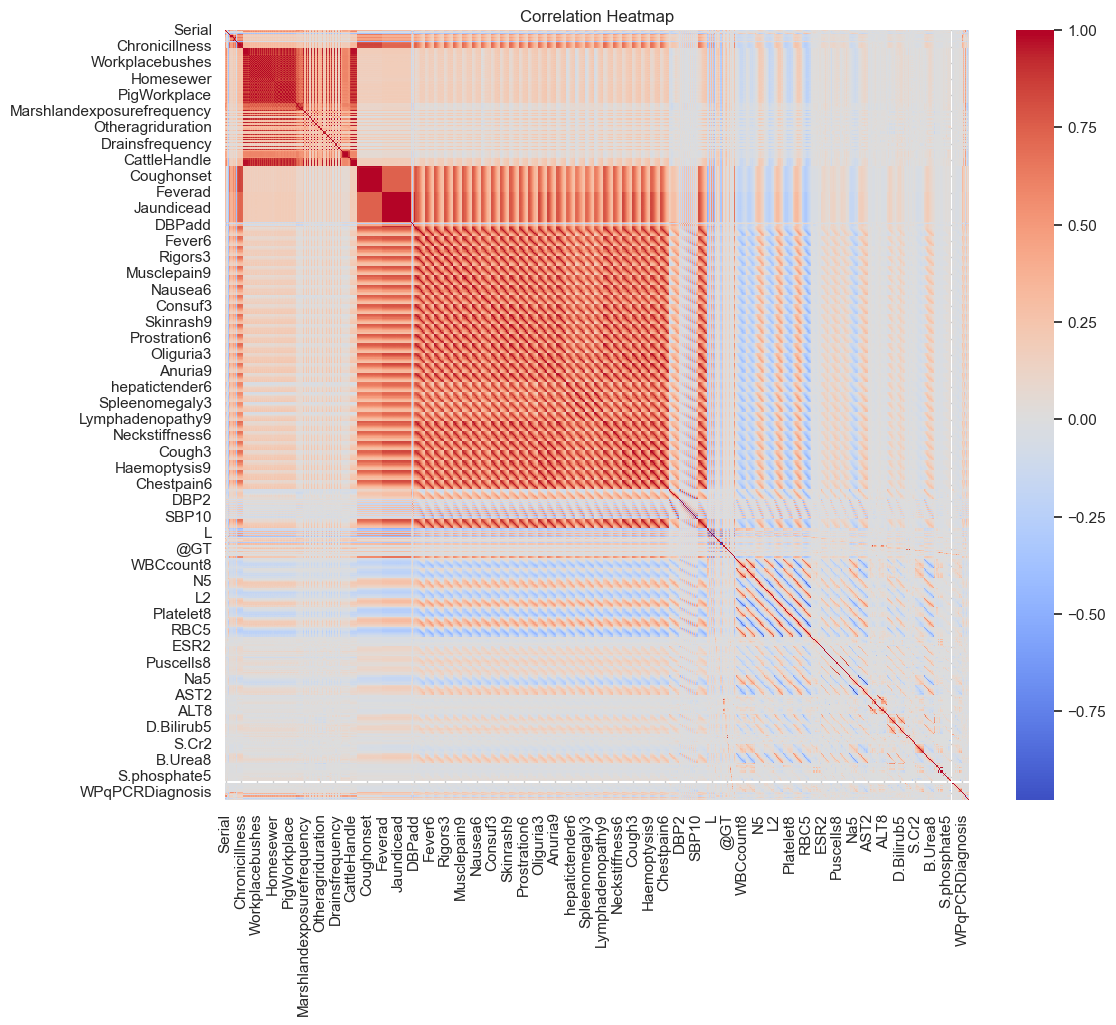

In [2104]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 10))
sns.heatmap(df[num_cols].corr(), annot=False, cmap='coolwarm', center=0)
plt.title("Correlation Heatmap")
plt.show()

📝 Why: Spot relationships and multicollinearity.
#### 1.6 Class Distribution of Target Variable

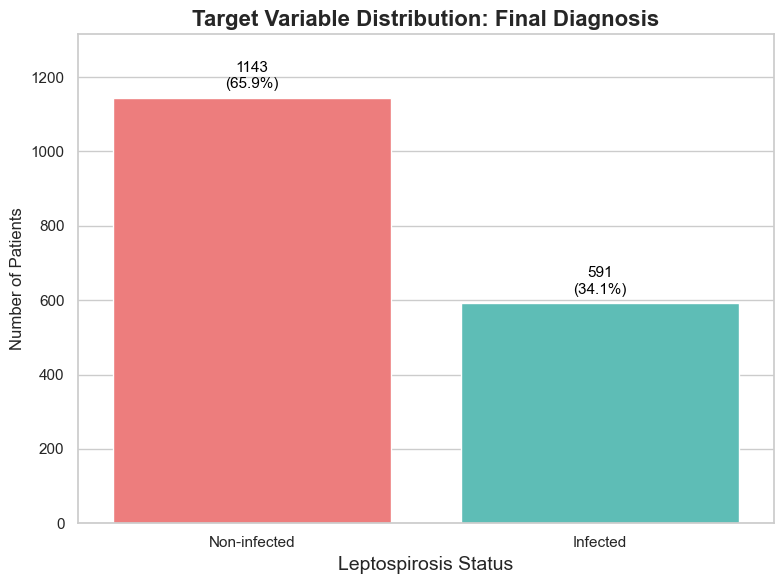

In [2105]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Map numeric codes to meaningful labels
df_plot_copy = df.copy()
df_plot_copy['Final_label'] = df_plot_copy['Final'].map({1: 'Infected', 2: 'Non-infected'})

# Define a custom pastel color palette
custom_palette = ["#FF6B6B", "#4ECDC4"]

# Set theme
sns.set_theme(style="whitegrid", context="notebook")

# Plot countplot with custom colors
plt.figure(figsize=(8, 6))
ax = sns.countplot(
    x='Final_label',
    data=df_plot_copy,
    palette=custom_palette,
)

# Annotate each bar with both count and percentage
total = len(df_plot_copy)
for p in ax.patches:
    count = int(p.get_height())
    pct = count / total * 100
    ax.annotate(f'{count}\n({pct:.1f}%)',
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom',
                fontsize=11, color='black',
                xytext=(0, 5), textcoords='offset points')

# Formatting
plt.title('Target Variable Distribution: Final Diagnosis', fontsize=16, weight='bold')
plt.xlabel('Leptospirosis Status', fontsize=14)
plt.ylabel('Number of Patients', fontsize=12)
plt.ylim(0, df_plot_copy['Final'].value_counts().max() * 1.15)
plt.tight_layout()
plt.show()

📝 Why: Understand skewness, outliers, and transformations.

## 2. Feature Engineering

Feature engineering is the process of transforming raw data into meaningful features that better represent the underlying problem to the predictive models. It plays a critical role in improving model accuracy and performance.

#### Common Feature Engineering Techniques:

- **Handling Missing Values**  
  Replace or drop missing values using strategies like mean, median, mode, or more advanced imputation methods.

- **Encoding Categorical Variables**  
  Convert categories to numeric form using:
  - **Label Encoding** for ordinal features (e.g., `Low`, `Medium`, `High`)
  - **One-Hot Encoding** for nominal features (e.g., `City`, `Color`)

- **Scaling and Normalization**  
  Standardize numerical features using techniques like Min-Max scaling or Z-score normalization, especially for distance-based models (e.g., KNN, SVM).

- **Feature Creation**  
  Generate new features that might reveal hidden patterns (e.g., ratios, bins, interaction terms).

- **Feature Selection**  
  Identify the most informative features using statistical tests or model-based importance (e.g., Random Forest feature importance).

- **Handling Outliers**  
  Remove or cap extreme values to reduce their impact on the model.

---

### 2.1 Handling Missing Values

#### 2.1.1 Handle Placeholder Values (99 → NaN)

In [2106]:
# Replace 99 with an empty string in the entire DataFrame
df.replace(99, '', inplace=True)

print("🔄 Replaced all 99 values with empty strings for better formatting.")

# Display the first rows of the modified DataFrame
df.head(20)

🔄 Replaced all 99 values with empty strings for better formatting.


,Serial,Year,Month,Hospital,Sample,ICU,OPD,Sex,Age,Ethnicity,...,FU_L.interrogansserovarMankarsostr.Mankarso,FU_L.santarosaiserovarGeorgiastr.LT117,FU_L.santarosaiserovarPyrogenesstr.Salinem,FU_L.interrogansserovarBataviaestr.VanTienan,FU_L.interrogansserovarAlexistr.616,FU_L.interrogansserovarAustralisstr.Ballico,FU_L.interrogansserovarwolfiistr.3705,FU_L.interrogansserovarWeerasinghe,FU_Patoc,Final
0,1,2016,4,7,1,2,1,2,48,1,...,,,,,,,,,,2
1,2,2016,4,7,1,2,1,2,55,1,...,,,,,,,,,,1
2,3,2016,4,7,1,2,2,1,43,1,...,,,,,,,,,,2
3,4,2016,4,7,1,2,2,1,42,1,...,,,,,,,,,,1
4,5,2016,4,7,1,2,2,2,55,1,...,,,,,,,,,,1
5,6,2016,4,7,1,2,2,2,63,1,...,,,,,,,,,,2
6,7,2016,4,7,1,2,1,2,58,2,...,,,,,,,,,,1
7,8,2016,4,7,1,2,2,1,15,1,...,,,,,,,,,,2
8,9,2016,4,7,1,2,1,2,19,1,...,,,,,,,,,,1
9,10,2016,4,7,1,2,1,2,87,1,...,,,,,,,,,,2


#### 2.1.2 Remove Missing Values

Step 1: Let's print the number of columns in the initial dataset.

In [2107]:
print(f"🧮 Number of columns before cleaning: {df.shape[1]}")

🧮 Number of columns before cleaning: 806


Step 2: Treat empty strings as NaN

In [2108]:
import numpy as np

df_replaced = df.replace('', np.nan)

Step 3: Print the data frame

In [2109]:
df_replaced.head(20)

,Serial,Year,Month,Hospital,Sample,ICU,OPD,Sex,Age,Ethnicity,...,FU_L.interrogansserovarMankarsostr.Mankarso,FU_L.santarosaiserovarGeorgiastr.LT117,FU_L.santarosaiserovarPyrogenesstr.Salinem,FU_L.interrogansserovarBataviaestr.VanTienan,FU_L.interrogansserovarAlexistr.616,FU_L.interrogansserovarAustralisstr.Ballico,FU_L.interrogansserovarwolfiistr.3705,FU_L.interrogansserovarWeerasinghe,FU_Patoc,Final
0,1.0,2016,4,7,1,2.0,1.0,2.0,48.0,1.0,...,,,,,,,,,,2
1,2.0,2016,4,7,1,2.0,1.0,2.0,55.0,1.0,...,,,,,,,,,,1
2,3.0,2016,4,7,1,2.0,2.0,1.0,43.0,1.0,...,,,,,,,,,,2
3,4.0,2016,4,7,1,2.0,2.0,1.0,42.0,1.0,...,,,,,,,,,,1
4,5.0,2016,4,7,1,2.0,2.0,2.0,55.0,1.0,...,,,,,,,,,,1
5,6.0,2016,4,7,1,2.0,2.0,2.0,63.0,1.0,...,,,,,,,,,,2
6,7.0,2016,4,7,1,2.0,1.0,2.0,58.0,2.0,...,,,,,,,,,,1
7,8.0,2016,4,7,1,2.0,2.0,1.0,15.0,1.0,...,,,,,,,,,,2
8,9.0,2016,4,7,1,2.0,1.0,2.0,19.0,1.0,...,,,,,,,,,,1
9,10.0,2016,4,7,1,2.0,1.0,2.0,87.0,1.0,...,,,,,,,,,,2


Step 4: Identify columns with >20% missing (NaN or empty string)

In [2110]:
missing_ratio = df_replaced.isnull().mean()
cols_to_drop = missing_ratio[missing_ratio > 0.20].index.tolist()

print("🗑️ Columns with > 20% missing values to be dropped:")
display(cols_to_drop)

🗑️ Columns with > 20% missing values to be dropped:


['Income',
 'Education',
 'Prophylactics',
 'Pasttreatments',
 'Pastantibiotics',
 'Chronicillness',
 'Possibleexposure',
 'Usualdrinkingwatersource',
 'Usualbathingwatersource',
 'Sourceofwaterforhousehold',
 'Garbagedisposalprocedure',
 'Accumilationofrefusal',
 'Availabilityofpublicgarbagecollectionprocedure',
 'HomeStreamrivercanaloranyotherrunningwatersource',
 'WorkplaceStreamrivercanaloranyotherrunningwatersource',
 'Homepondlaketankoranyotherstagnantwatersource',
 'WorkPlacepondlaketankoranyotherstagnantwatersource',
 'Homemarshywetland',
 'Workplacemarshywet',
 'HomeBushes',
 'Workplacebushes',
 'Homeforest',
 'Workplaceforest',
 'Homeworkingpaddyfield',
 'WorkPlaceworkingpaddyfield',
 'Homeabondantpaddyfield',
 'Workplaceabondantpaddyfield',
 'Homeotheragricultural',
 'workplaceotheragricultural',
 'Homeanimalfarm',
 'Workplaceanimalfarm',
 'Homegarbageaccumilation',
 'Workplacegarbageaccumilation',
 'Homeblockeddrainage',
 'Workplaceblockeddrainage',
 'Homesewer',
 'Workplac

Step 5: Drop identified columns

In [2111]:
df_cleaned = df.drop(columns=cols_to_drop)

Step 6: Print column count after dropping

In [2112]:
print(f"✅ Number of columns after dropping: {df_cleaned.shape[1]}")

✅ Number of columns after dropping: 100


Step 7: Let's check if there are any missing values remaining.

In [2113]:
def check_missing_values(df):
    """
    Checks for missing values in the DataFrame and prints columns with missing counts.

    Parameters:
    df (pd.DataFrame): The DataFrame to check.

    Returns:
    pd.Series: Series of columns with missing values and their counts.
    """
    missing = df.isnull().sum()
    missing = missing[missing > 0]

    if missing.empty:
        print("✅ No missing values in the DataFrame.")
    else:
        print("⚠️ Columns with missing values:")
        display(missing)

    return missing

# Check for missing values in the cleaned DataFrame
check_missing_values(df_cleaned)

✅ No missing values in the DataFrame.


Series([], dtype: int64)

### 2.2 Handling Outliers in Numeric Columns Using Z-Score

Step 1: Define a function that identifies outliers in numerical columns

In [2114]:
from scipy.stats import zscore

# Detect outliers using Z-score method
def detect_outliers_zscore(df, threshold=3):
    # Select only numeric columns
    numeric_cols = df.select_dtypes(include=[np.number])

    # Compute Z-scores
    z_scores = numeric_cols.apply(zscore, nan_policy='omit')

    # Identify outlier positions
    outlier_indices = np.where(np.abs(z_scores) > threshold)

    # Pack outlier information
    outlier_info = list(zip(
        numeric_cols.columns[outlier_indices[1]],
        outlier_indices[0]
    ))

    # Deduplicate and sort
    outlier_info = sorted(set(outlier_info), key=lambda x: x[1])

    return outlier_info

Step 2: Define a function to print the outliers

In [2115]:
# Print outliers
def print_outliers(df):
    """
    Prints outliers detected in the DataFrame.
    """
    outliers = detect_outliers_zscore(df)
    if outliers:
        print("Outliers detected at:")
        for col, row in outliers:
            print(f"Row {row}, Column '{col}'")
    else:
        print("✅ No outliers detected in numerical columns.")

Step 3: Identify and print outliers

In [2116]:
# Print outliers
print_outliers(df_cleaned)

✅ No outliers detected in numerical columns.


Step 4: Write a function to remove outliers

In [2117]:
def remove_outliers_zscore(df, threshold=3):
    # Select only numeric columns
    numeric_cols = df.select_dtypes(include=[np.number])

    # Compute Z-scores
    z_scores = numeric_cols.apply(zscore, nan_policy='omit')

    # Mask rows where any Z-score is above the threshold
    outlier_mask = (np.abs(z_scores) > threshold).any(axis=1)

    # Count how many outliers will be removed
    num_outliers = outlier_mask.sum()

    # Remove those rows
    df_cleaned = df[~outlier_mask].reset_index(drop=True)

    print(f"✅ Removed {num_outliers} rows with outliers.")
    return df_cleaned

Step 5: Remove the outliers using about function

In [2118]:
# Apply the function to remove outliers
df_no_outliers = remove_outliers_zscore(df_cleaned)

✅ Removed 0 rows with outliers.


### 2.3 Handle Categorical Variables

Step 1: Write a function to identify categorical columns

In [2119]:
def get_categorical_columns(df):
    """
    Identifies and prints categorical columns in the DataFrame.

    Parameters:
    df (pd.DataFrame): The DataFrame to analyze.

    Returns:
    List[str]: A list of categorical column names.
    """
    categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

    if categorical_cols:
        print("🧾 Categorical columns detected:")
        for col in categorical_cols:
            print(f" - {col}")
    else:
        print("✅ No categorical columns found.")

    return categorical_cols

Step 2: Apply the function to get the categorical columns from the dataset

In [2120]:
# Apply the function
categorical_columns = get_categorical_columns(df_no_outliers)

🧾 Categorical columns detected:
 - Serial
 - ICU
 - OPD
 - Sex
 - Age
 - Ethnicity
 - TertiaryEducation
 - Puscells
 - Redcells
 - PulseRhythem
 - Redcells3
 - Redcells4
 - Redcells6
 - Redcells7
 - Redcells8
 - Redcells10
 - WPqPCRDiagnosis
 - MAT_set_1
 - Pomona
 - Bratislava
 - Canicola
 - Icterohaemorrhagiae
 - Mankarso
 - Georgia
 - Pyrogene
 - Bataviae
 - Wolfii
 - Geyaweera
 - Weerasinghe
 - Ceylonica
 - Alice
 - Patoc
 - Autumnalis
 - Alex
 - Ballum
 - Djasiman
 - Australis
 - Tarassovi
 - Ratnapura
 - Borincana
 - Celledoni
 - Grippotyphosa
 - PomonaF
 - BratislavaF
 - CanicolaF
 - IcterohaemorrhagiaeF
 - MankarsoF
 - GeorgiaF
 - PyrogeneF
 - BataviaeF
 - WolfiiF
 - GeyaweeraF
 - WeerasingheF
 - CeylonicaF
 - AliceF
 - PatocF
 - AutumnalisF
 - AlexF
 - BallumF
 - DjasimanF
 - AustralisF
 - TarassoviF
 - RatnapuraF
 - BorincanaF
 - CelledoniF
 - GrippotyphosaF
 - Acu_L.interrogansserovarBratislavastr.JezBratislava
 - Acu_L.interrogansserovarAutumnalisstr.AkiyamiA
 - Acu_L.weili

Step 3: Write a function which perform label encoding on the categorical columns we found

In [2121]:
from sklearn.preprocessing import LabelEncoder

# Step 1: Label encode categorical columns
def label_encode_columns(df, categorical_cols):
    """
    Performs label encoding on given categorical columns.

    Parameters:
    df (pd.DataFrame): The DataFrame to transform.
    categorical_cols (List[str]): The list of categorical column names.

    Returns:
    pd.DataFrame: DataFrame with label-encoded categorical columns.
    """
    df_encoded = df.copy()
    le = LabelEncoder()

    for col in categorical_cols:
        df_encoded[col] = le.fit_transform(df_encoded[col].astype(str))

    print("✅ Label encoding completed for categorical columns.")
    return df_encoded

Step 4: Apply the function to Encode categorical variables or columns that we identified

In [2122]:
# Encode categorical columns
df_encoded = label_encode_columns(df_no_outliers, categorical_columns)

✅ Label encoding completed for categorical columns.


Step 5: Let's confirm there are no remaining categorical variables 

In [2123]:
# Apply the function on df_encoded
categorical_columns = get_categorical_columns(df_encoded)

✅ No categorical columns found.


### 2.4 Remove Unncessasary Columns

Step 1: Remove the 'Serial' colum from the dataset

In [2124]:
# Remove the 'Serial' column
df_encoded.drop(columns=['Serial'], inplace=True)
print("✅ 'Serial' column removed.")

✅ 'Serial' column removed.


Step 2: Print the dataset to verify if the 'Serial' column is gone

In [2125]:
# Print the data frame
df_encoded.head()

,Year,Month,Hospital,Sample,ICU,OPD,Sex,Age,Ethnicity,TertiaryEducation,...,FU_L.interrogansserovarMankarsostr.Mankarso,FU_L.santarosaiserovarGeorgiastr.LT117,FU_L.santarosaiserovarPyrogenesstr.Salinem,FU_L.interrogansserovarBataviaestr.VanTienan,FU_L.interrogansserovarAlexistr.616,FU_L.interrogansserovarAustralisstr.Ballico,FU_L.interrogansserovarwolfiistr.3705,FU_L.interrogansserovarWeerasinghe,FU_Patoc,Final
0,2016,4,7,1,2,1,2,39,1,0,...,0,0,0,0,0,0,0,0,0,2
1,2016,4,7,1,2,1,2,47,1,3,...,0,0,0,0,0,0,0,0,0,1
2,2016,4,7,1,2,2,1,34,1,3,...,0,0,0,0,0,0,0,0,0,2
3,2016,4,7,1,2,2,1,33,1,3,...,0,0,0,0,0,0,0,0,0,1
4,2016,4,7,1,2,2,2,47,1,3,...,0,0,0,0,0,0,0,0,0,1


### 2.5 Feature Selection

Step 1: Write a function that identifies significant features using a Random Forest Classifier

In [2126]:
from sklearn.ensemble import RandomForestClassifier

def identify_significant_features(df, target_column="Final", top_n=15):
    X = df.drop(columns=[target_column])
    y = df[target_column]

    # Train Random Forest
    model = RandomForestClassifier(random_state=42)
    model.fit(X, y)

    # Extract importance
    importances = model.feature_importances_
    feature_names = X.columns
    feature_importance = pd.DataFrame({
        "Feature": feature_names,
        "Importance": importances
    })

    top_features = feature_importance.sort_values(by="Importance", ascending=False).head(top_n)
    return top_features

Step 2: Apply the function to get the significan features

In [2127]:
top_features = identify_significant_features(df_encoded, target_column="Final", top_n=15)

Step 3: Write a function to plot the significant features

In [2128]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_top_features(top_features):
    """
    Plots the top important features based on model importance scores.

    Parameters:
    - top_features (DataFrame): A DataFrame with 'Feature' and 'Importance' columns.
    """
    # Define a custom cute pastel color palette
    custom_palette = ["#FFB6B9", "#FAE3D9", "#BBDED6", "#8AC6D1", "#F8ECD1", "#D5AAFF"]

    plt.figure(figsize=(10, 6))
    sns.set_style("whitegrid")

    barplot = sns.barplot(
        data=top_features,
        x="Importance",
        y="Feature",
        palette=custom_palette[:len(top_features)]
    )

    # Annotate values
    for p in barplot.patches:
        width = p.get_width()
        if not pd.isna(width):
            barplot.annotate(f'{width:.3f}',
                             (width + 0.002, p.get_y() + p.get_height() / 2),
                             va='center', fontsize=9, color='black')

    plt.title("Top Important Features Based on Random Forest", fontsize=16, weight='bold')
    plt.xlabel("Feature Importance Score", fontsize=12)
    plt.ylabel("Feature Name", fontsize=12)
    plt.xlim(0, top_features["Importance"].max() * 1.10)
    plt.tight_layout()
    plt.grid(axis='x', linestyle='--', alpha=0.3)
    plt.show()

Step 4: Plot the significant variables

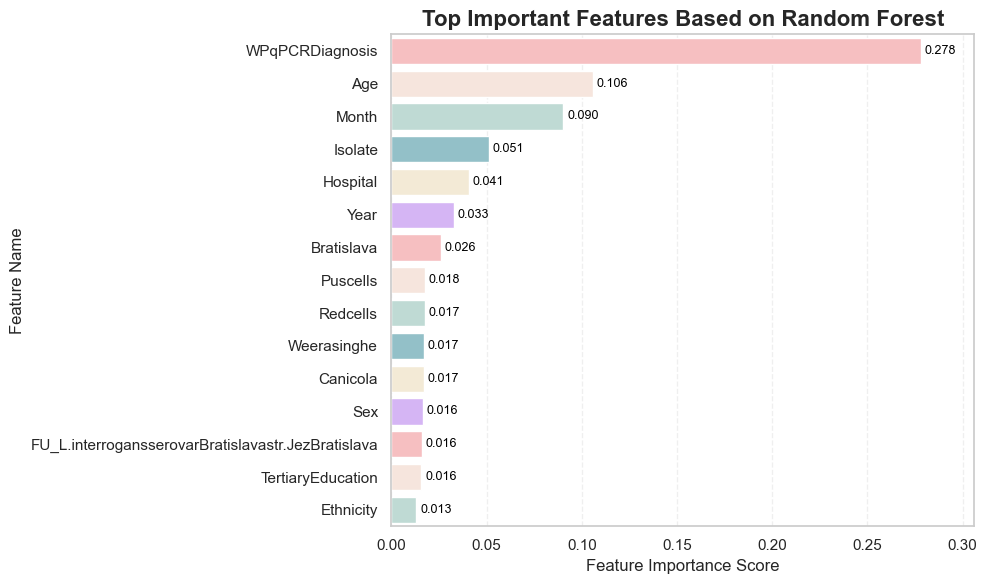

In [2129]:
plot_top_features(top_features)

#### Feature Importance Analysis

The bar chart titled **"Top Important Features Based on Random Forest"** visually represents the significance of each feature in predicting the target variable using the Random Forest classifier.

---

##### ✅ Key Observations

- **`WPqPCRDiagnosis`** stands out as the most influential feature, contributing significantly more than any other feature.  
  This suggests a strong relationship between PCR test results and the final diagnosis.

- **`Age`**, **`Month`**, and **`Isolate`** also show considerable importance,  
  indicating that demographic and temporal features, along with bacterial isolation status, are useful in predicting outcomes.

- Features such as **`Hospital`**, **`Year`**, and **`TertiaryEducation`** follow in importance,  
  potentially reflecting variations in care settings and socio-economic factors.

- The least important features include **`ICU`**, **`Sample`**, and **`OPD`**,  
  implying they may have limited predictive value for this specific dataset and task.

---

##### 📌 Interpretation

- Feature importance helps in understanding model behavior and can guide feature selection to improve model efficiency.

- A feature with low importance isn't always useless; it might be relevant in interaction with other features or under different models.

- The significant gap between the top feature and others suggests that **`WPqPCRDiagnosis`** might dominate the prediction,  
  which could raise questions about feature dependency or data leakage.  
  It's worth verifying that this feature is not overly correlated with the target.

---

## 3. Model Training and Evaluation

Step 1: Define a function to split the dataset by train and test sets


In [2130]:
from sklearn.model_selection import train_test_split

def split_dataframe(df, target_column, test_size=0.3, random_state=42):
    # Separate features and target
    X = df.drop(columns=[target_column])
    y = df[target_column]

    # Split the data with stratification and fixed seed
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=random_state, stratify=y
    )

    return X_train, X_test, y_train, y_test

Step 2: Split the data frame into train set and test set

In [2131]:
X_train, X_test, y_train, y_test = split_dataframe(df_encoded, target_column='Final')

Step 3: Write a function to evaluate a model and store its metrics

In [2132]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def evaluate_model_metrics(model, X_test, y_test):
    y_pred = model.predict(X_test)

    metrics = {
        'Accuracy': accuracy_score(y_test, y_pred) * 100,
        'Precision': precision_score(y_test, y_pred, average='binary') * 100,
        'Recall': recall_score(y_test, y_pred, average='binary') * 100,
        'F1 Score': f1_score(y_test, y_pred, average='binary') * 100
    }
    return metrics

Step 4: Train a Random Forest Classider model and evaluate it

In [2133]:
from sklearn.ensemble import RandomForestClassifier

results = {}

# Train and evaluate Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
results['Random Forest'] = evaluate_model_metrics(rf_model, X_test, y_test)

Step 5: Write a function to plot the evaluation metrics

In [2134]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def plot_model_metrics(model_name, results_dict):
    """
    Plots evaluation metrics for a given model from the results dictionary.

    Parameters:
    - model_name (str): Name of the model as stored in the results dictionary.
    - results_dict (dict): Dictionary containing evaluation metrics for models.
    """
    # Check if model exists in results
    if model_name not in results_dict:
        print(f"Model '{model_name}' not found in results.")
        return

    # Prepare DataFrame
    model_metrics = results_dict[model_name]
    df = pd.DataFrame(list(model_metrics.items()), columns=['Metric', 'Score'])

    # Define custom pastel color palette
    custom_palette = ["#FFB6B9", "#FAE3D9", "#BBDED6", "#8AC6D1", "#F8ECD1", "#D5AAFF"]

    # Plot
    plt.figure(figsize=(8, 5))
    sns.set_style("whitegrid")
    bar = sns.barplot(data=df, x='Score', y='Metric',
                      palette=custom_palette[:len(df)])  # Limit to number of metrics

    # Annotate
    for p in bar.patches:
        bar.annotate(f'{p.get_width():.1f}%',
                     (p.get_width() + 0.5, p.get_y() + p.get_height() / 2),
                     va='center', fontsize=10)

    plt.title(f'Evaluation Metrics for {model_name}', fontsize=14, weight='bold')
    plt.xlabel('Score (%)')
    plt.xlim(0, 100)
    plt.tight_layout()
    plt.show()

Step 6: Plot the evaluation metrics

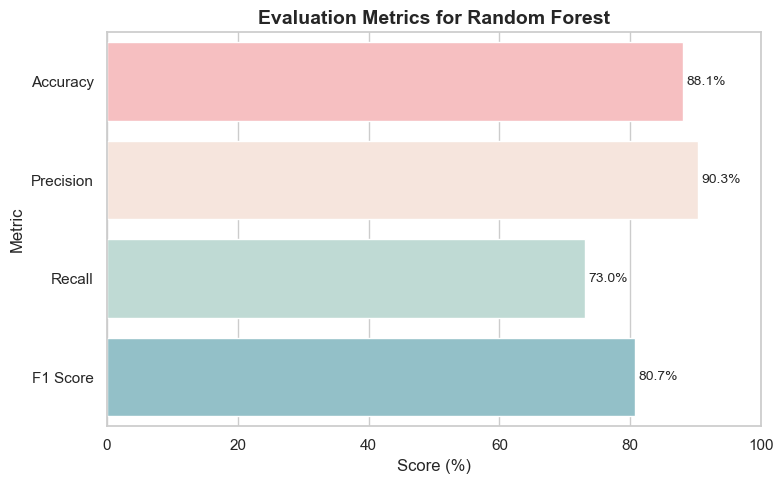

In [2135]:
plot_model_metrics("Random Forest", results)

### Model Evaluation Metrics Explained

Understanding how to evaluate a classification model is critical for interpreting its performance. Below are the key metrics used:

---

#### **1. Accuracy**
- **Definition**: The proportion of total predictions the model got correct.
- **When to Use**: Most useful when the classes are balanced.

---

#### **2. Precision**
- **Definition**: Of all instances predicted as *positive*, how many were actually *positive*.
- **When to Use**: Important when the cost of false positives is high (e.g., misdiagnosing someone as sick when they’re healthy).

---

#### **3. Recall (Sensitivity or True Positive Rate)**
- **Definition**: Of all actual *positive* cases, how many did the model correctly identify.
- **When to Use**: Important when the cost of false negatives is high (e.g., failing to detect a disease).

---

#### **4. F1 Score**
- **Definition**: The harmonic mean of Precision and Recall, offering a balance between the two.
- **When to Use**: Best when classes are imbalanced and you need to balance precision and recall.

---

## 4. Improving The Model

### 4.1 Handle Highly Correlated Features

Highly correlated features (multicollinearity) can cause overfitting or redundancy. Here’s how we can detect and remove them.

Step 1: Calculate the correlation matrix

In [2136]:
corr_matrix = df_encoded.drop(columns=['Final']).corr().abs()

Step 2: Select upper triangle of correlation matrix

In [2137]:
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

Step 3: Find features with correlation greater than 0.9

In [2138]:
high_corr_features = [column for column in upper.columns if any(upper[column] > 0.9)]

Step 4: Print highly correlated features

In [2139]:
display("Highly correlated features to remove:", high_corr_features)

'Highly correlated features to remove:'

['BorincanaF',
 'Acu_L.weiliiserovarCelledonistr.Celledoni',
 'Acu_L.interrogansserovarCanicolastr.Ruebush',
 'Acu_L.interrogansserovarIcterohaemorrhagiaestr.RGA',
 'Acu_L.interrogansserovarMankarsostr.Mankarso',
 'Acu_L.santarosaiserovarGeorgiastr.LT117',
 'Acu_L.santarosaiserovarPyrogenesstr.Salinem',
 'Acu_L.interrogansserovarBataviaestr.VanTienan',
 'Acu_L.interrogansserovarAlexistr.616',
 'Acu_L.interrogansserovarAustralisstr.Ballico',
 'Acu_L.interrogansserovarwolfiistr.3705',
 'Acu_L.interrogansserovarWeerasinghe',
 'Acu_Patoc',
 'FU_L.weiliiserovarCelledonistr.Celledoni',
 'FU_L.interrogansserovarCanicolastr.Ruebush',
 'FU_L.interrogansserovarIcterohaemorrhagiaestr.RGA',
 'FU_L.interrogansserovarMankarsostr.Mankarso',
 'FU_L.santarosaiserovarGeorgiastr.LT117',
 'FU_L.santarosaiserovarPyrogenesstr.Salinem',
 'FU_L.interrogansserovarBataviaestr.VanTienan',
 'FU_L.interrogansserovarAlexistr.616',
 'FU_L.interrogansserovarAustralisstr.Ballico',
 'FU_L.interrogansserovarwolfiistr.37

Step 5: Remove those Highly correlated features

In [2140]:
df_reduced = df_encoded.drop(columns=high_corr_features)

Step 6: Re-split the dataset into training set and testing set

In [2141]:
X_train, X_test, y_train, y_test = split_dataframe(df_reduced, target_column='Final')

Step 7: Retrain the model and evaluate

In [2142]:
# Train and evaluate Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
results['Random Forest'] = evaluate_model_metrics(rf_model, X_test, y_test)

Step 8: Plot the evaluation metrics

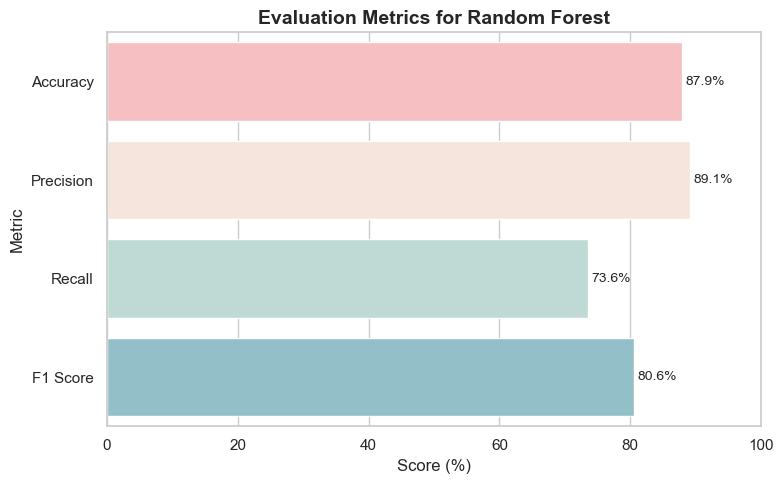

In [2143]:
plot_model_metrics("Random Forest", results)

### 4.2 Try Different Models

Step 1: Train and evaluate Gradient Boosting Classifier

In [2144]:
from sklearn.ensemble import GradientBoostingClassifier

# Train and evaluate Gradient Boosting
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train, y_train)
results['Gradient Boosting'] = evaluate_model_metrics(gb_model, X_test, y_test)

Step 2: Train and evaluate Logistic Regression Classifier

In [2145]:
from sklearn.linear_model import LogisticRegression

# Train and evaluate Logistic Regression
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)
results['Logistic Regression'] = evaluate_model_metrics(lr_model, X_test, y_test)

Step 3: Train and evaluate Support Vector Machine Classifier

In [2146]:
from sklearn.svm import SVC

# Train and evaluate SVM
svm_model = SVC(probability=True)
svm_model.fit(X_train, y_train)
results['SVM'] = evaluate_model_metrics(svm_model, X_test, y_test)

Step 4: Train and evaluate K-Nearest Neighbors Classifier

In [2147]:
from sklearn.neighbors import KNeighborsClassifier

# Train and evaluate KNN
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
results['KNN'] = evaluate_model_metrics(knn_model, X_test, y_test)

Step 5: Train and evaluate Naive Bayes Classifier

In [2148]:
from sklearn.naive_bayes import GaussianNB

# Train and evaluate Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
results['Naive Bayes'] = evaluate_model_metrics(nb_model, X_test, y_test)

Step 6: Plot results of each classifier we trained

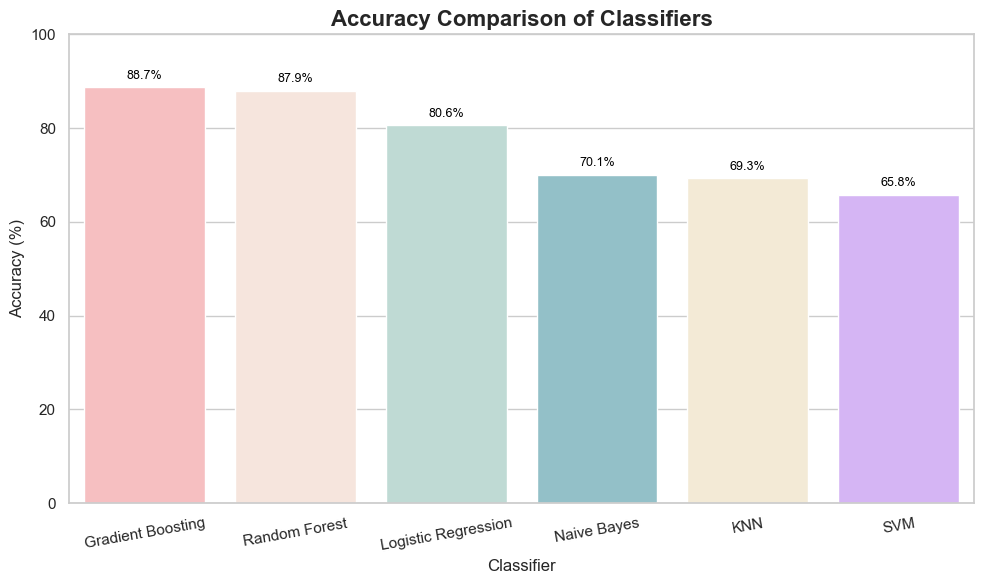

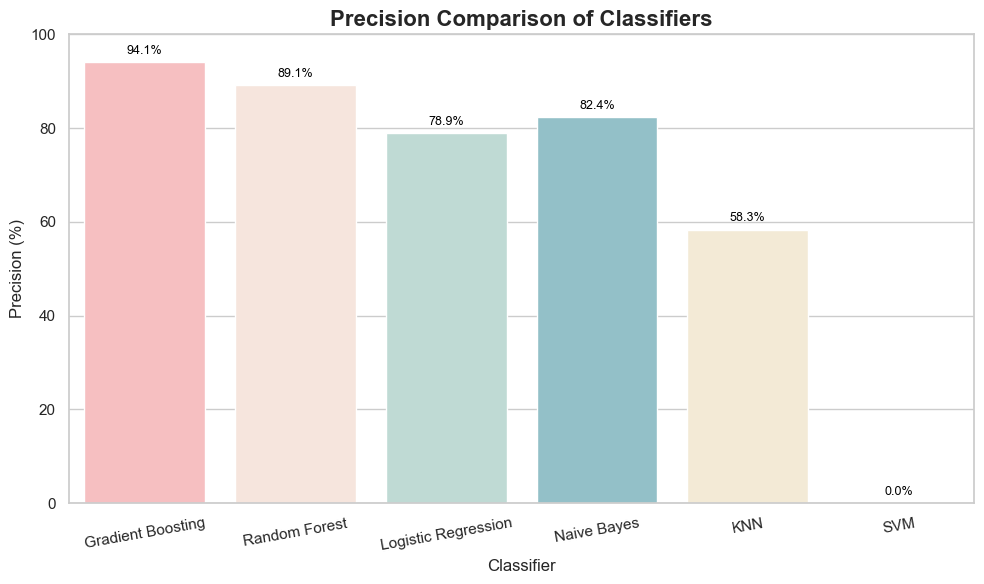

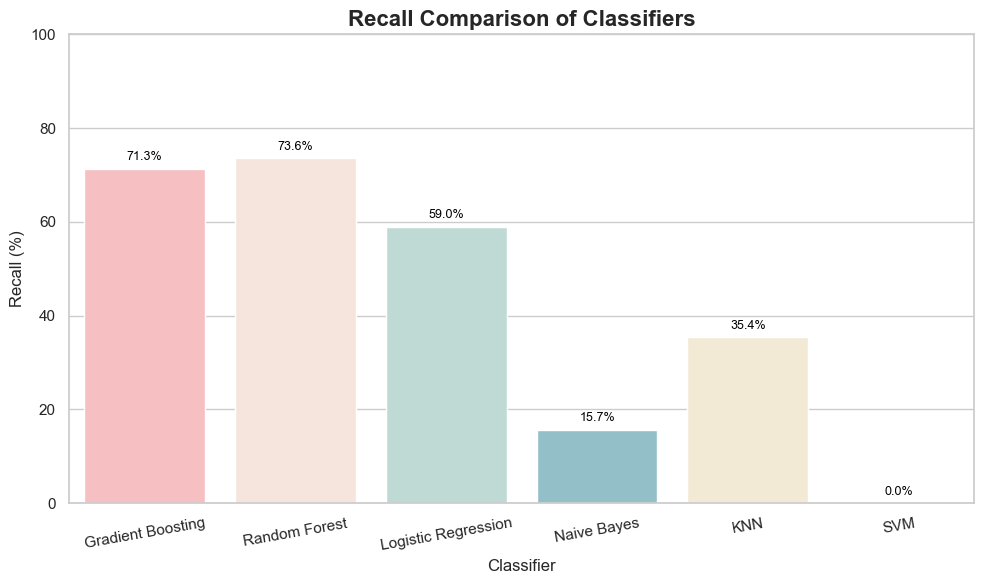

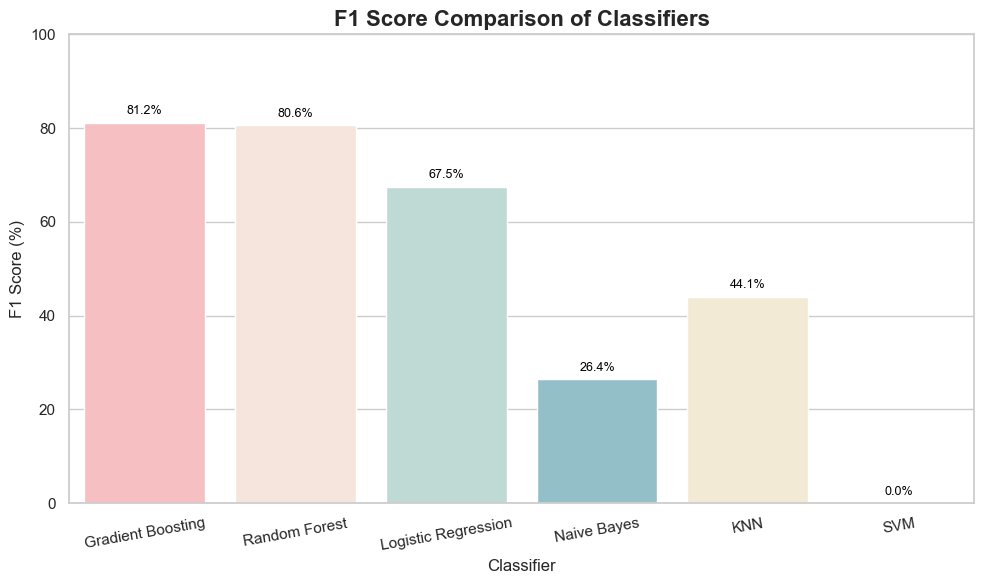

In [2149]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Convert results to DataFrame and sort by Accuracy
results_df = pd.DataFrame(results).T.reset_index().rename(columns={'index': 'Model'})
results_df.sort_values(by='Accuracy', ascending=False, inplace=True)

# Set theme
sns.set_theme(style="whitegrid", context="notebook")

# Define metrics to plot
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

# Define custom cute color palette
custom_palette = ["#FFB6B9", "#FAE3D9", "#BBDED6", "#8AC6D1", "#F8ECD1", "#D5AAFF"]

# Plot each metric
for metric in metrics:
    plt.figure(figsize=(10, 6))
    barplot = sns.barplot(
        data=results_df,
        x='Model',
        y=metric,
        palette=custom_palette,
    )

    # Annotate bars with values
    for p in barplot.patches:
        value = p.get_height()
        if not pd.isna(value):
            barplot.annotate(f'{value:.1f}%',
                             (p.get_x() + p.get_width() / 2., value),
                             ha='center', va='bottom',
                             fontsize=9, color='black', xytext=(0, 4),
                             textcoords='offset points')

    # Titles and labels
    plt.title(f'{metric} Comparison of Classifiers', fontsize=16, weight='bold')
    plt.ylabel(f'{metric} (%)', fontsize=12)
    plt.xlabel('Classifier', fontsize=12)
    plt.ylim(0, 100)
    plt.xticks(rotation=10)
    plt.tight_layout()
    plt.show()

Step 7: Compare all evaluation metrics with a single graph

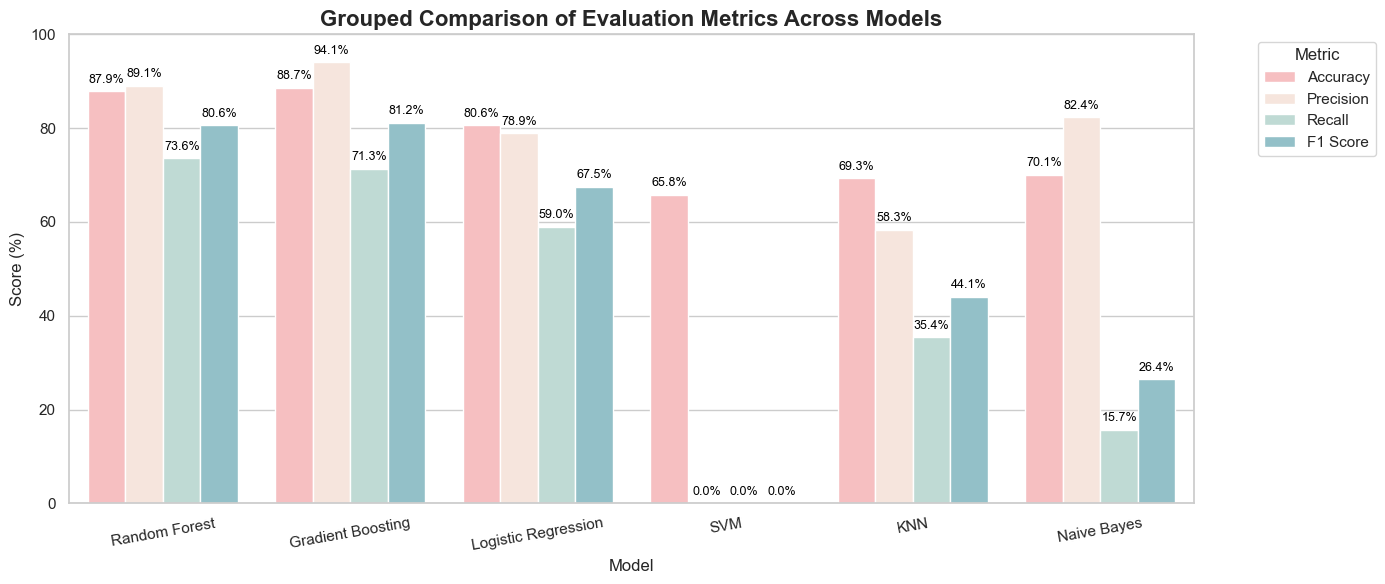

In [2150]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Convert results to DataFrame and melt it
results_df = pd.DataFrame(results).T.reset_index().rename(columns={'index': 'Model'})
results_melted = results_df.melt(id_vars='Model', var_name='Metric', value_name='Score')

# Define custom pastel color palette
custom_palette = ["#FFB6B9", "#FAE3D9", "#BBDED6", "#8AC6D1", "#F8ECD1", "#D5AAFF"]

# Set the theme
sns.set_theme(style="whitegrid")

# Create the grouped bar plot with custom colors
plt.figure(figsize=(14, 6))
barplot = sns.barplot(
    data=results_melted,
    x='Model',
    y='Score',
    hue='Metric',
    palette=custom_palette[:results_melted['Metric'].nunique()],  # Limit palette to number of metrics
)

# Annotate each bar with the score value
for bar in barplot.patches:
    height = bar.get_height()
    if not pd.isna(height):
        barplot.annotate(f'{height:.1f}%',
                         (bar.get_x() + bar.get_width() / 2., height),
                         ha='center', va='bottom',
                         fontsize=9, color='black', xytext=(0, 4),
                         textcoords='offset points')

# Final formatting
plt.title('Grouped Comparison of Evaluation Metrics Across Models', fontsize=16, weight='bold')
plt.ylabel('Score (%)')
plt.xlabel('Model')
plt.ylim(0, 100)
plt.legend(title='Metric', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=10)
plt.tight_layout()
plt.show()